In [1]:
import nltk
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

In [2]:
nltk.download(['punkt', 'stopwords'])

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
def preprocess_text(input_text):
    words = word_tokenize(input_text)
    words = [word.lower() for word in words]
    words = [word for word in words if word.isalnum()]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    preprocessed_text = ' '.join(words)
    return preprocessed_text

In [4]:
def extract_top_keywords(input_text, num_keywords= 5):
    preprocessed_text = preprocess_text(input_text)
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([preprocessed_text])

    feature_names = vectorizer.get_feature_names_out()
    svd = TruncatedSVD(n_components= num_keywords)

    tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)
    top_indices = tfidf_matrix_reduced[0].argsort()[::-1]

    top_keywords = [feature_names[index] for index in top_indices]

    return top_keywords

In [5]:
input_text = '''
Ahmedabad, Jun 18 (PTI) Insurance companies are facing challenges in settling claims of the Ahmedabad Air India plane crash victims last week as in many cases the policyholders and nominees both have died in the tragedy.

There are instances of an entire family perishing or one of the spouses dying in the horrific June 12 crash of the London-bound plane, which claimed the lives of 241 persons on board and 29 on the ground.

Immediately after the accident, the Insurance Regulatory and Development Authority of India (IRADI) asked insurance companies to verify details of the deceased with their database on issuance of the overseas medical insurance, personal accident and life insurance policies.

The advisory also stated no claim was to be denied or delayed due to procedural formalities in the case of confirmed deceased individuals from the passengers' list and persons at buildings affected by the crash.

Accordingly, major insurers like the Life Insurance Corporation of India, New India Assurance, HDFC Life, Iffco Tokio General Insurance, Bajaj Allianz GIC and Tata AIG Insurance have set up their help desks at the Ahmedabad Civil Hospital to expedite the process.

The insurers said they are matching the data shared by authorities with their database and are proactively reaching out to the families.

LIC administrative officer Ashish Shukla told PTI that the company has so far received 10 claims at the hospital and its offices.

There is one case where the insured individual nominated the spouse and both died in the accident, said the officer from the country's largest insurance company.

Manpreet Singh Sabharwal, manager (claims) at Iffco Tokio insurance, also pointed to a case where the director of a company and his wife, who was his nominee, died in the plane crash.

The company has group insured its employees with Iffco Tokio, he said.

Tata AIG's principal officer, zonal operations, Nischal Buch said they have so far received seven claims, of which one is a case where the deceased had nominated the spouse who, too, killed in the air crash.

The task becomes difficult when both the insured individual and the nominee die, like in the case of air accidents, representatives of the insurance firms maintained.

Shukla said in normal circumstances, they seek a succession certificate when both the insured individual and the nominee have died. As a special case, the company has now made an exception.

"If both the insured as well as the nominee have died, we look for class one heirs, which is typically blood relatives like children. If there are multiple children, then we take a declaration from the heirs on how the claim is to be settled and an indemnity bond has to be submitted to the company," he said.

Buch said his company's legal team is exploring if joint declarations of the heirs can be sought in cases where both the insured and the nominee have died.

It is not just the life that is insured. There are cases of personal accident insurance, luggage insurance and even marine cargo insurance.

Prakash Khanchandani, administrative officer with The New India Assurance, said the company has so far received seven claims --five related to personal accident policy and two of the marine cargo on board. It has settled one marine cargo claim of ₹6.50 lakh.

In cases of personal accident policy, the nominees are yet to submit their details as they are still in the process of disposing of the bodies, he said.

Bajaj Allianz regional manager Nimish Joshi said the company has received four claims related to the crash victims.

One is a marine cargo claim of ₹55 lakh which has been settled. The remaining three are travel insurance policies of ₹10 lakh each and those claims have also been settled, he added.
'''

top_keywords = extract_top_keywords(input_text)

print("Top Keywords: ", top_keywords)

Top Keywords:  ['10']


/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var


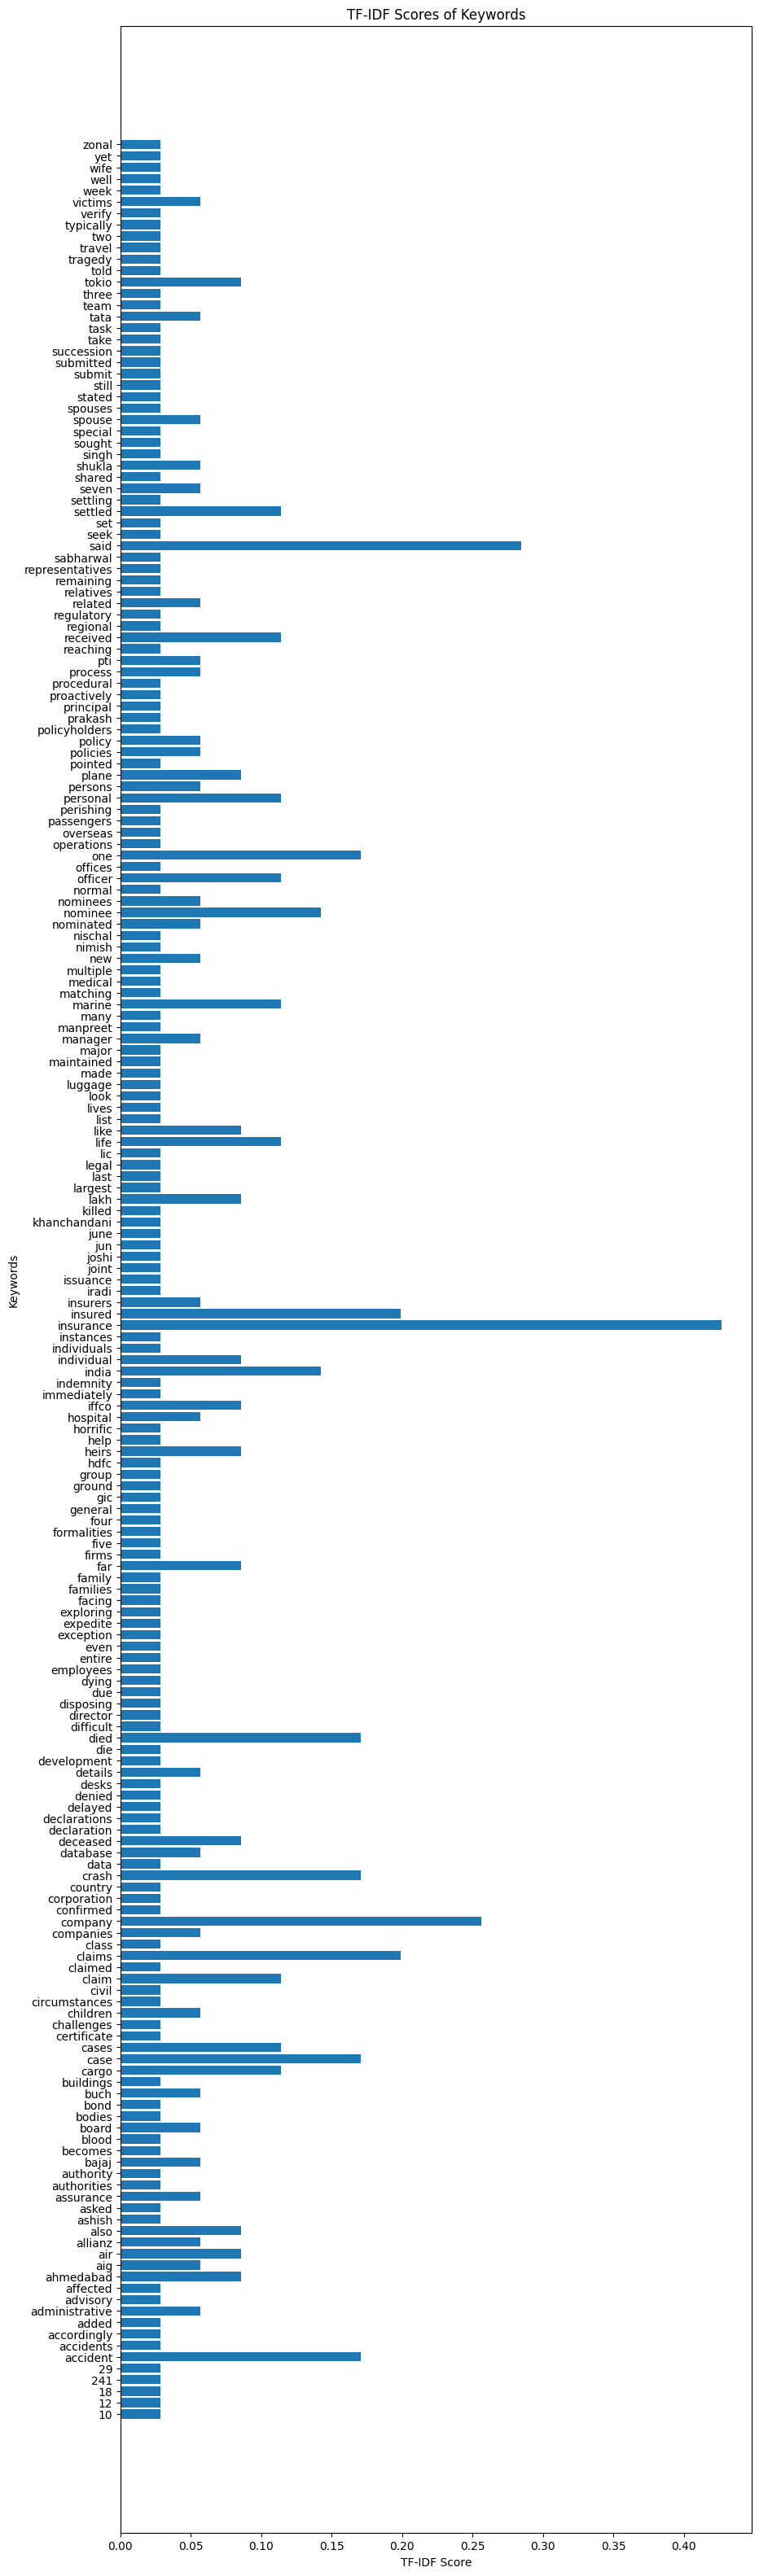

In [6]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([preprocess_text(input_text)])

feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()[0]
plt.figure(figsize=(10, 40))
plt.barh(range(len(feature_names)), tfidf_scores, align= 'center')

plt.yticks(range(len(feature_names)), feature_names)

plt.xlabel('TF-IDF Score')
plt.ylabel('Keywords')
plt.title('TF-IDF Scores of Keywords')
plt.show()